# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
max_temp = []
wind = []

record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

print('-----------------------------')
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    try:
        response = requests.get(f"{url}&q={city}").json() 
        new_cities.append(response["name"])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
        time.sleep(1.01)

    except:
        print("City not found. Skipping...")
 

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 1 of set 0 | kapaa
Processing record 2 of set 0 | busselton
Processing record 3 of set 0 | alofi
Processing record 4 of set 0 | bredasdorp
Processing record 5 of set 0 | kaka
Processing record 6 of set 0 | ushuaia
Processing record 7 of set 0 | pirgos
Processing record 8 of set 0 | butaritari
Processing record 9 of set 0 | progreso
Processing record 10 of set 0 | chuy
City not found. Skipping...
Processing record 12 of set 0 | eidfjord
City not found. Skipping...
Processing record 14 of set 0 | cape town
Processing record 15 of set 0 | hambantota
Processing record 16 of set 0 | hami
Processing record 17 of set 0 | nizhniy baskunchak
Processing record 18 of set 0 | rikitea
Processing record 19 of set 0 | minna
Processing record 20 of set 0 | hasaki
Processing record 21 of set 0 | atenas
Processing record 22 of set 0 | castro
Processing record 23 of set 0 | qaqortoq
Processing record 24

Processing record 1 of set 4 | mahebourg
City not found. Skipping...
City not found. Skipping...
Processing record 4 of set 4 | suleja
Processing record 5 of set 4 | pevek
Processing record 6 of set 4 | tuktoyaktuk
Processing record 7 of set 4 | pajapan
Processing record 8 of set 4 | astana
Processing record 9 of set 4 | aquidauana
City not found. Skipping...
Processing record 11 of set 4 | batesville
Processing record 12 of set 4 | cidreira
Processing record 13 of set 4 | manama
Processing record 14 of set 4 | manokwari
Processing record 15 of set 4 | saint-andre-les-vergers
City not found. Skipping...
Processing record 17 of set 4 | ilulissat
Processing record 18 of set 4 | hamilton
City not found. Skipping...
Processing record 20 of set 4 | hobyo
Processing record 21 of set 4 | manicore
Processing record 22 of set 4 | brindisi
Processing record 23 of set 4 | tuatapere
Processing record 24 of set 4 | aqtobe
Processing record 25 of set 4 | cabo san lucas
Processing record 26 of set 4 

Processing record 5 of set 8 | kambove
Processing record 6 of set 8 | khandbari
City not found. Skipping...
City not found. Skipping...
Processing record 9 of set 8 | pangnirtung
Processing record 10 of set 8 | banda aceh
Processing record 11 of set 8 | zanjan
Processing record 12 of set 8 | kruisfontein
Processing record 13 of set 8 | atima
Processing record 14 of set 8 | asyut
Processing record 15 of set 8 | lahaina
Processing record 16 of set 8 | tyup
Processing record 17 of set 8 | hammel
Processing record 18 of set 8 | kalmunai
Processing record 19 of set 8 | vuktyl
Processing record 20 of set 8 | noumea
Processing record 21 of set 8 | maniitsoq
Processing record 22 of set 8 | nurota
Processing record 23 of set 8 | yerofey pavlovich
Processing record 24 of set 8 | shelburne
Processing record 25 of set 8 | zonguldak
Processing record 26 of set 8 | mareeba
Processing record 27 of set 8 | hwange
Processing record 28 of set 8 | itaituba
Processing record 29 of set 8 | beckley
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Temp": temp,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Temp          539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [6]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,40,US,1575520868,83,77.00,22.08,-159.32,77.00,10.29
1,Busselton,0,AU,1575520869,8,97.00,-33.64,115.35,97.00,14.12
2,Alofi,20,NU,1575520870,74,80.60,-19.06,-169.92,80.60,3.36
3,Bredasdorp,0,ZA,1575520871,72,62.01,-34.53,20.04,62.01,13.00
4,Kaka,98,TM,1575520872,53,55.76,37.35,59.62,55.76,9.19


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

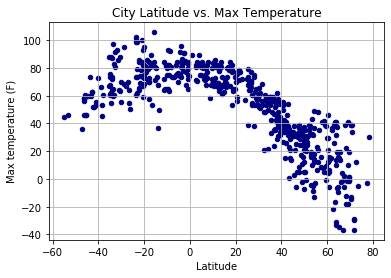

In [19]:
weather_data.plot(kind='scatter', x='Lat', y='Max Temp', c='navy')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

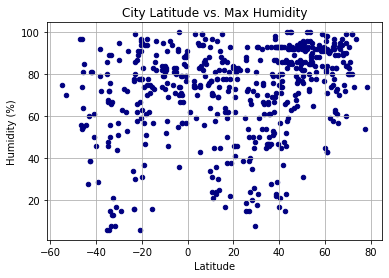

In [22]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='navy')
plt.title('City Latitude vs. Max Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/LatitudeHumidity.png")

#### Latitude vs. Cloudiness Plot

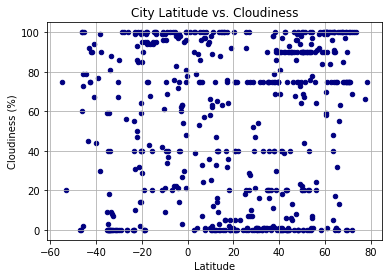

In [25]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='navy')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/LatitudeHumidity.png")

#### Latitude vs. Wind Speed Plot

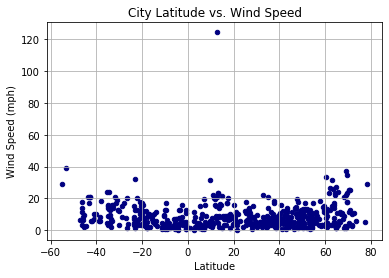

In [27]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='navy')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/LatitudeWindSpeed.png")